# Fit log curves for Dragut & Kang

Offline demo: use points in `literature_matrix.csv` → fit  
`y = a · log(b·x + 1)` → store parameters & plot.


In [4]:
# ---- add project root so we can 'import src.*' ----
import sys, pathlib, os
ROOT = pathlib.Path(os.getcwd()).parent      # notebooks/.. = project root
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))
print("Added to sys.path:", ROOT)


Added to sys.path: c:\Users\zuzia\OneDrive - Temple University\Documents\MS Computational DS\Summer 2025\Research\Project\cost-utility-calculator


In [5]:
import os, sys, pandas as pd, numpy as np, matplotlib.pyplot as plt
%matplotlib inline

# allow 'src' imports
sys.path.append(os.path.abspath('..'))

from src.curves import fit_log_curve
from src.utils  import parse_curve   # already written earlier

df = pd.read_csv('../docs/literature_matrix.csv')
df[['Paper', 'Key Curve Data']].head()

,Paper,Key Curve Data
0,Dragut et al. 2019,0:0.58;30:0.72;60:0.78;120:0.80
1,Kang et al. 2023,0:0.65;100:0.76;300:0.81;600:0.83
2,Stiennon et al. 2021,0:0.0;5000:0.15;20000:0.24;40000:0.28
3,Strubell et al. 2019,GPUh:626 kWh ≈ 280 kg CO₂


Dragut fit  a=0.061  b=4742.4022  RMSE=0.290


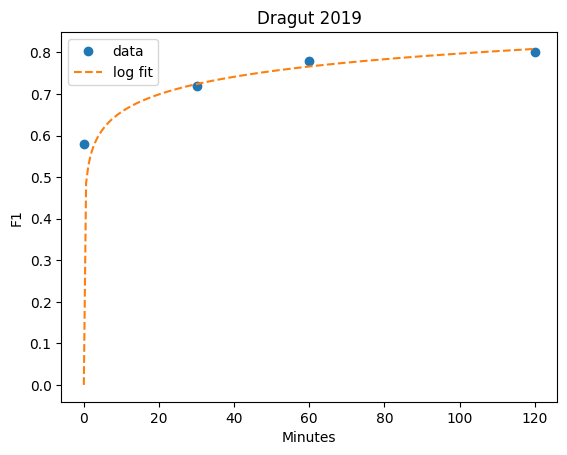

In [6]:
row_d = df[df['Paper'].str.contains('Dragut')].iloc[0]
x_d, y_d = zip(*parse_curve(row_d['Key Curve Data']))

fit   = fit_log_curve(x_d, y_d)
a_d,b_d   = fit["a"], fit["b"]
rmse_d  = fit["rmse"]

print(f"Dragut fit  a={a_d:.3f}  b={b_d:.4f}  RMSE={rmse_d:.3f}")

x_dense = np.linspace(0, max(x_d), 200)
y_fit   = a_d * np.log(b_d * x_dense + 1)

plt.plot(x_d, y_d, 'o', label='data')
plt.plot(x_dense, y_fit, '--', label='log fit')
plt.title('Dragut 2019')
plt.xlabel('Minutes'); plt.ylabel('F1'); plt.legend()
plt.savefig('../docs/figures/dragut_log_fit.png', dpi=150)
plt.show()


Kang fit    a=0.051  b=22742.8715  RMSE=0.325


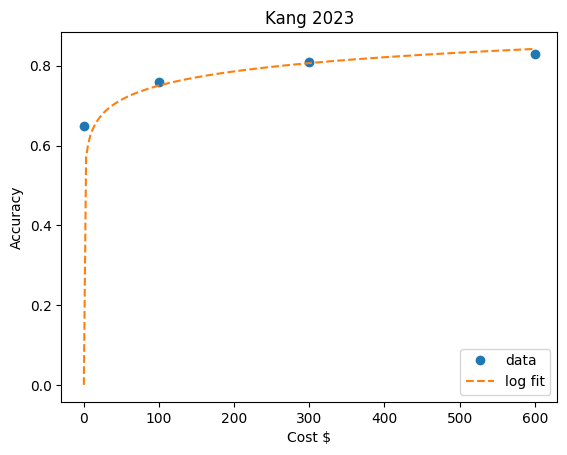

In [7]:
row_k = df[df['Paper'].str.contains('Kang')].iloc[0]
x_k, y_k = zip(*parse_curve(row_k['Key Curve Data']))

fit   = fit_log_curve(x_k, y_k)
a_k,b_k   = fit["a"], fit["b"]
rmse_k  = fit["rmse"]

print(f"Kang fit    a={a_k:.3f}  b={b_k:.4f}  RMSE={rmse_k:.3f}")

x_dense = np.linspace(0, max(x_k), 200)
plt.plot(x_k, y_k, 'o', label='data')
plt.plot(x_dense, a_k*np.log(b_k*x_dense + 1), '--', label='log fit')
plt.title('Kang 2023')
plt.xlabel('Cost $'); plt.ylabel('Accuracy'); plt.legend()
plt.savefig('../docs/figures/kang_log_fit.png', dpi=150)
plt.show()


In [8]:
# --- Save fitted parameters to data/curves.json ---

import json, pathlib

fits = {
    "Dragut2019": {"a": a_d, "b": b_d, "rmse": rmse_d},
    "Kang2023":   {"a": a_k, "b": b_k, "rmse": rmse_k}
}

path = pathlib.Path("../data/curves.json")
path.write_text(json.dumps(fits, indent=2))
print("Saved →", path.resolve(), "\n", json.dumps(fits, indent=2))


Saved → C:\Users\zuzia\OneDrive - Temple University\Documents\MS Computational DS\Summer 2025\Research\Project\cost-utility-calculator\data\curves.json 
 {
  "Dragut2019": {
    "a": 0.06100439260859058,
    "b": 4742.4021702638,
    "rmse": 0.2901197876389743
  },
  "Kang2023": {
    "a": 0.05125402181006701,
    "b": 22742.871465292897,
    "rmse": 0.32509730650961494
  }
}
